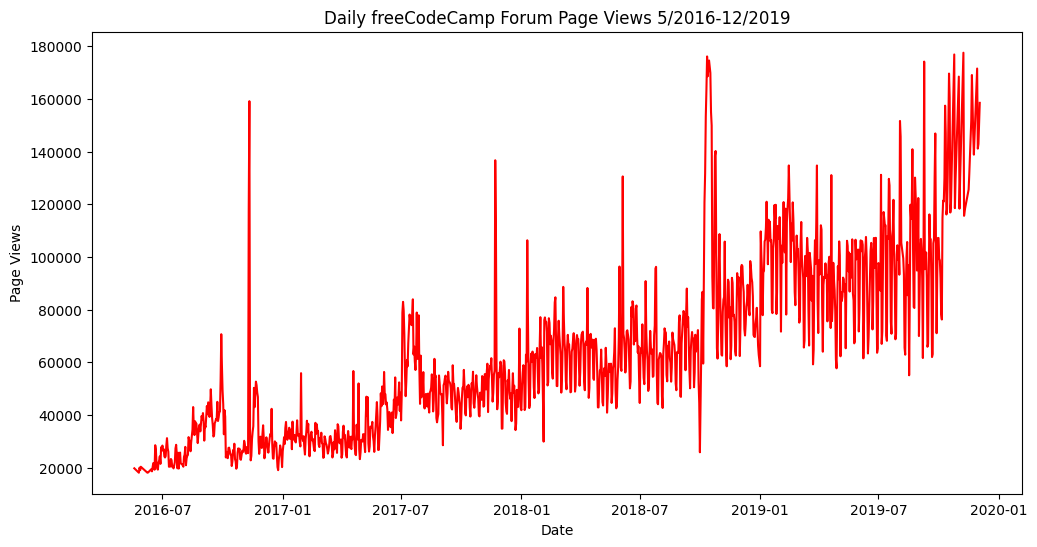

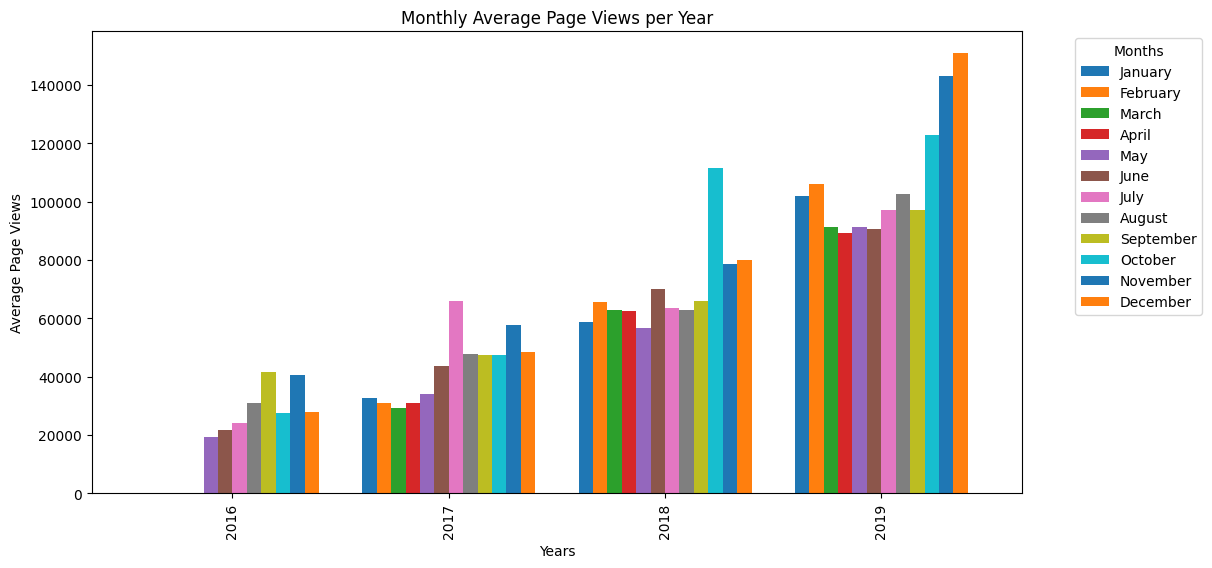

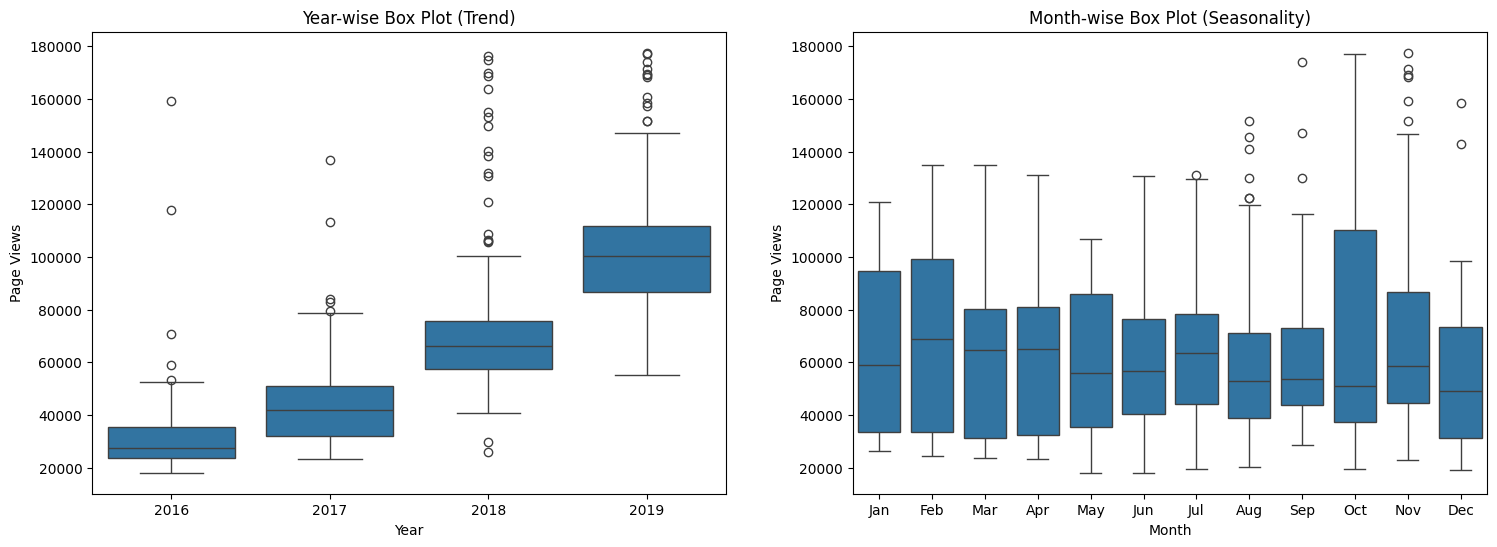

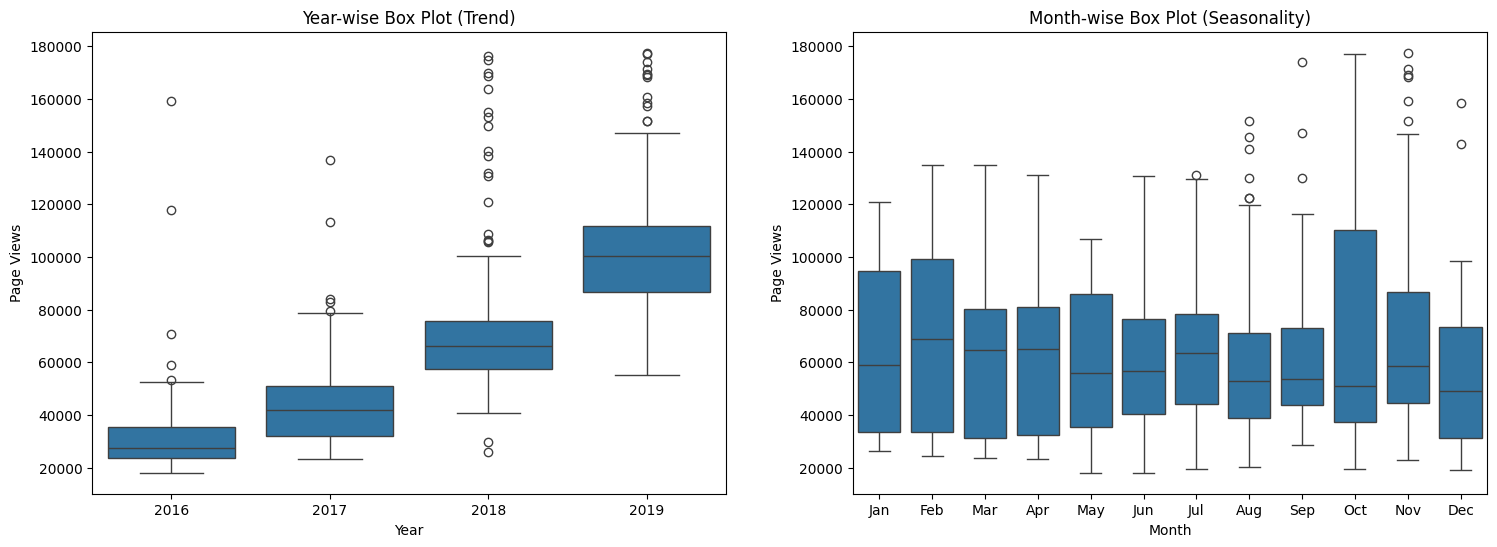

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='red', linewidth=1.5)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    plt.show()
    return fig


def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar['month_name'] = df_bar.index.strftime('%B')
    # Group and pivot
    df_bar = df_bar.groupby(['year', 'month_name'])['value'].mean().unstack()
    # Ensure correct month order
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar[months]

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    df_bar.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title('Monthly Average Page Views per Year')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    plt.show()
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    # Sort months for correct order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    plt.show()
    return fig

# Wywołaj funkcje, aby zobaczyć wykresy w notebooku:
draw_line_plot()
draw_bar_plot()
draw_box_plot()